In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [2]:
w=4

In [3]:
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [4]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475333, 4, 16)
strides:  (512, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x27bb7e5d040
byteorder:  little
byteswap:  False
type: float64


In [5]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [6]:
np.info(labels)

class:  ndarray
shape:  (475333,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x27bc6682040
byteorder:  little
byteswap:  False
type: float64


In [7]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [8]:
training_sample_labels

380266

In [9]:
training_sample

380266

In [10]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [11]:
train_X.shape

(380266, 4, 15)

In [12]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
#print(train_X)

In [14]:
train_y.shape

(380266,)

In [15]:
#print(test_y)

In [16]:
train_y=train_y.reshape(train_y.shape[0],1)

In [17]:
test_y=test_y.reshape(test_y.shape[0],1)

In [18]:
#print(train_X)

In [19]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380266, 4, 15) (380266, 1) (95067, 4, 15) (95067, 1)


In [20]:
model_gru =  keras.models.Sequential([
    keras.layers.GRU(128,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),#,activation='relu'),
    keras.layers.GRU(units=64,return_sequences=True),#,activation='relu'),
    keras.layers.GRU(units=32),#,activation='relu'),
    keras.layers.Dense(units=50,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])

opt=keras.optimizers.SGD(learning_rate=0.9)
model_gru.compile(loss='MSE', optimizer=opt,metrics=['accuracy'])

In [21]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 4, 128)            55680     
                                                                 
 gru_1 (GRU)                 (None, 4, 64)             37248     
                                                                 
 gru_2 (GRU)                 (None, 32)                9408      
                                                                 
 dense (Dense)               (None, 50)                1650      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 104,037
Trainable params: 104,037
Non-trainable params: 0
_________________________________________________________________


In [22]:
 start = t.time()

In [23]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=300,validation_data=(test_X, test_y),batch_size=4096)#, shuffle=False)

Epoch 1/300
93/93 [==============================] - 69s 110ms/step - loss: 0.1935 - accuracy: 0.7341 - val_loss: 0.1857 - val_accuracy: 0.7531
Epoch 2/300
93/93 [==============================] - 2s 17ms/step - loss: 0.1915 - accuracy: 0.7393 - val_loss: 0.1846 - val_accuracy: 0.7531
Epoch 3/300
93/93 [==============================] - 2s 17ms/step - loss: 0.1881 - accuracy: 0.7393 - val_loss: 0.1786 - val_accuracy: 0.7531
Epoch 4/300
93/93 [==============================] - 2s 16ms/step - loss: 0.1810 - accuracy: 0.7398 - val_loss: 0.1756 - val_accuracy: 0.7476
Epoch 5/300
93/93 [==============================] - 2s 17ms/step - loss: 0.1806 - accuracy: 0.7384 - val_loss: 0.1821 - val_accuracy: 0.7531
Epoch 6/300
93/93 [==============================] - 2s 16ms/step - loss: 0.1787 - accuracy: 0.7386 - val_loss: 0.1690 - val_accuracy: 0.7536
Epoch 7/300
93/93 [==============================] - 2s 17ms/step - loss: 0.1765 - accuracy: 0.7389 - val_loss: 0.1675 - val_accuracy: 0.7531
Epoc

93/93 [==============================] - 1s 16ms/step - loss: 0.1571 - accuracy: 0.7541 - val_loss: 0.1527 - val_accuracy: 0.7587
Epoch 59/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1568 - accuracy: 0.7550 - val_loss: 0.1526 - val_accuracy: 0.7599
Epoch 60/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1583 - accuracy: 0.7537 - val_loss: 0.1532 - val_accuracy: 0.7581
Epoch 61/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1572 - accuracy: 0.7543 - val_loss: 0.1583 - val_accuracy: 0.7511
Epoch 62/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1567 - accuracy: 0.7555 - val_loss: 0.1569 - val_accuracy: 0.7530
Epoch 63/300
93/93 [==============================] - 1s 15ms/step - loss: 0.1570 - accuracy: 0.7545 - val_loss: 0.1546 - val_accuracy: 0.7555
Epoch 64/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1567 - accuracy: 0.7547 - val_loss: 0.1560 - val_accuracy: 0.7552
Epoch 65/300

93/93 [==============================] - 1s 16ms/step - loss: 0.1520 - accuracy: 0.7670 - val_loss: 0.1483 - val_accuracy: 0.7733
Epoch 116/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1514 - accuracy: 0.7692 - val_loss: 0.1482 - val_accuracy: 0.7747
Epoch 117/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1516 - accuracy: 0.7686 - val_loss: 0.1466 - val_accuracy: 0.7761
Epoch 118/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1511 - accuracy: 0.7697 - val_loss: 0.1463 - val_accuracy: 0.7777
Epoch 119/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1511 - accuracy: 0.7699 - val_loss: 0.1505 - val_accuracy: 0.7733
Epoch 120/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1513 - accuracy: 0.7695 - val_loss: 0.1461 - val_accuracy: 0.7764
Epoch 121/300
93/93 [==============================] - 1s 15ms/step - loss: 0.1505 - accuracy: 0.7703 - val_loss: 0.1462 - val_accuracy: 0.7759
Epoch 

Epoch 172/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1470 - accuracy: 0.7764 - val_loss: 0.1488 - val_accuracy: 0.7771
Epoch 173/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1476 - accuracy: 0.7760 - val_loss: 0.1455 - val_accuracy: 0.7784
Epoch 174/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1472 - accuracy: 0.7761 - val_loss: 0.1438 - val_accuracy: 0.7805
Epoch 175/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1477 - accuracy: 0.7758 - val_loss: 0.1438 - val_accuracy: 0.7814
Epoch 176/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1472 - accuracy: 0.7764 - val_loss: 0.1437 - val_accuracy: 0.7813
Epoch 177/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1472 - accuracy: 0.7760 - val_loss: 0.1460 - val_accuracy: 0.7791
Epoch 178/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1474 - accuracy: 0.7758 - val_loss: 0.1436 - val_accuracy:

Epoch 229/300
93/93 [==============================] - 2s 16ms/step - loss: 0.1448 - accuracy: 0.7801 - val_loss: 0.1438 - val_accuracy: 0.7815
Epoch 230/300
93/93 [==============================] - 2s 17ms/step - loss: 0.1451 - accuracy: 0.7804 - val_loss: 0.1432 - val_accuracy: 0.7814
Epoch 231/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1448 - accuracy: 0.7805 - val_loss: 0.1435 - val_accuracy: 0.7799
Epoch 232/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1450 - accuracy: 0.7802 - val_loss: 0.1424 - val_accuracy: 0.7836
Epoch 233/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1452 - accuracy: 0.7798 - val_loss: 0.1439 - val_accuracy: 0.7816
Epoch 234/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1449 - accuracy: 0.7803 - val_loss: 0.1431 - val_accuracy: 0.7828
Epoch 235/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1445 - accuracy: 0.7808 - val_loss: 0.1425 - val_accuracy:

Epoch 286/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1435 - accuracy: 0.7818 - val_loss: 0.1418 - val_accuracy: 0.7840
Epoch 287/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1436 - accuracy: 0.7824 - val_loss: 0.1422 - val_accuracy: 0.7832
Epoch 288/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1434 - accuracy: 0.7824 - val_loss: 0.1422 - val_accuracy: 0.7848
Epoch 289/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1431 - accuracy: 0.7826 - val_loss: 0.1427 - val_accuracy: 0.7842
Epoch 290/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1433 - accuracy: 0.7820 - val_loss: 0.1430 - val_accuracy: 0.7804
Epoch 291/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1433 - accuracy: 0.7823 - val_loss: 0.1417 - val_accuracy: 0.7841
Epoch 292/300
93/93 [==============================] - 1s 16ms/step - loss: 0.1432 - accuracy: 0.7827 - val_loss: 0.1440 - val_accuracy:

In [24]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 14s 4ms/step


In [25]:
stop=t.time()-start
print(stop)

559.5225546360016


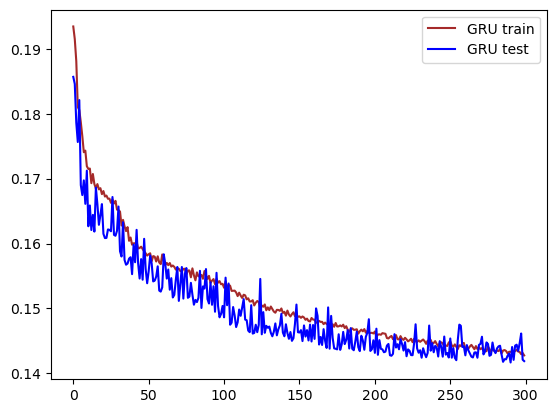

In [26]:
#plt.plot(gru_history.history['accuracy'], label='GRU accuracy', color='green')
#plt.plot(gru_history.history['val_accuracy'], label='GRU val_accuracy', color='yellow')
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

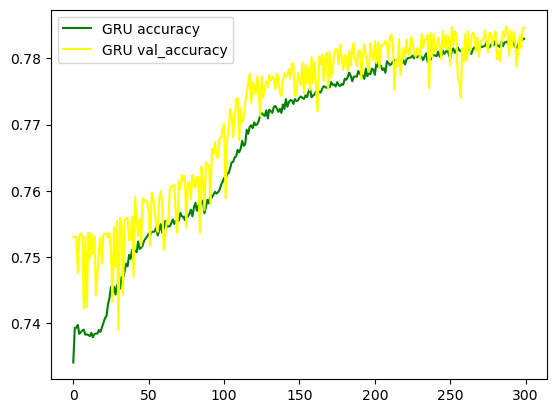

In [27]:
plt.plot(gru_history.history['accuracy'], label='GRU accuracy', color='green')
plt.plot(gru_history.history['val_accuracy'], label='GRU val_accuracy', color='yellow')
plt.legend()
plt.show()

In [28]:
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [29]:
np.shape(pred_y)

(95067, 1)

In [30]:
pred_y

array([[0.00082174],
       [0.0029229 ],
       [0.00962695],
       ...,
       [0.06356606],
       [0.06788015],
       [0.06940757]], dtype=float32)

In [31]:
pred_y=np.reshape(pred_y,95067)

0.1418694763473421
0.23710281123288246
0.37665564690754616
0.27698367310885125


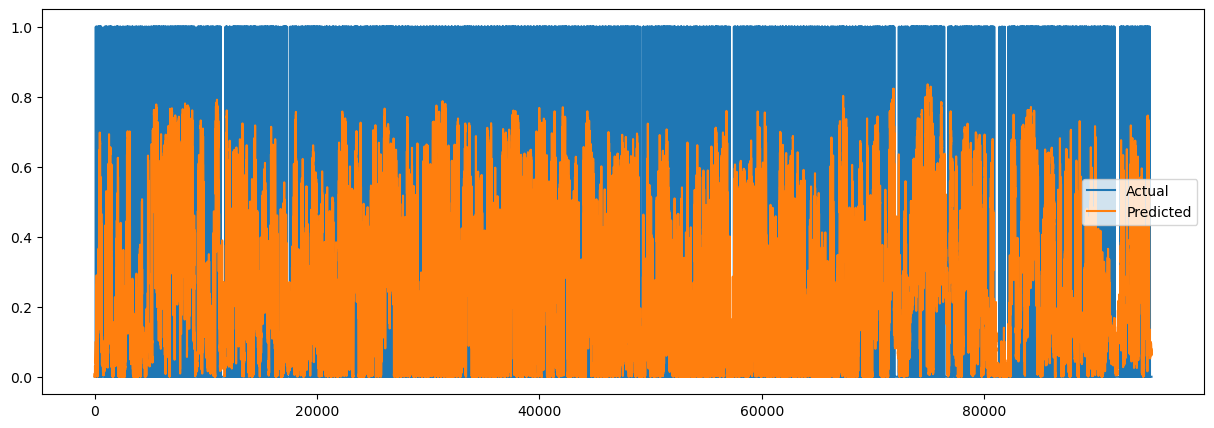

In [32]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)


plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [33]:
np.shape(train_X)

(380266, 4, 15)

In [34]:
np.shape(train_y)

(380266, 1)

In [35]:
np.shape(test_X)

(95067, 4, 15)

In [36]:
np.shape(test_y)

(95067, 1)

14855/14855 [==============================] - 62s 4ms/step


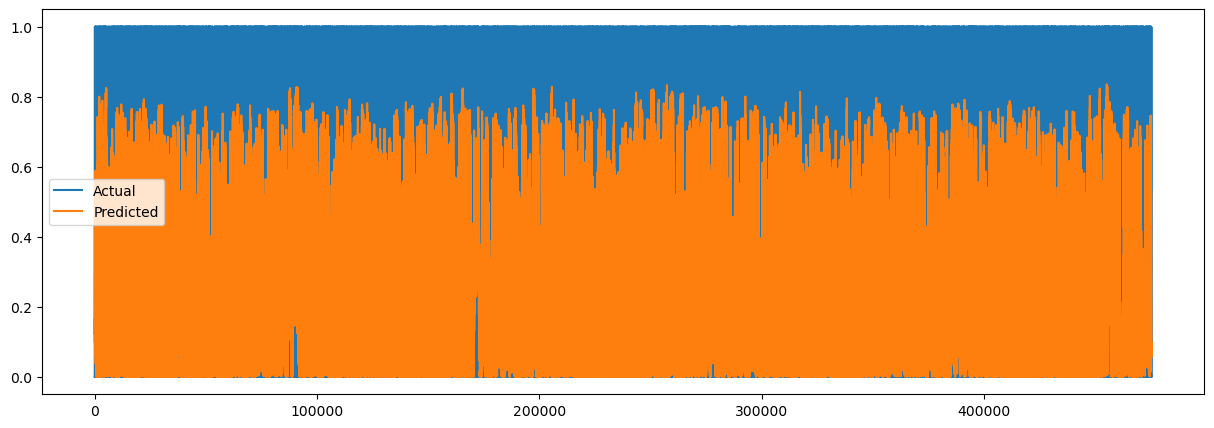

In [37]:
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

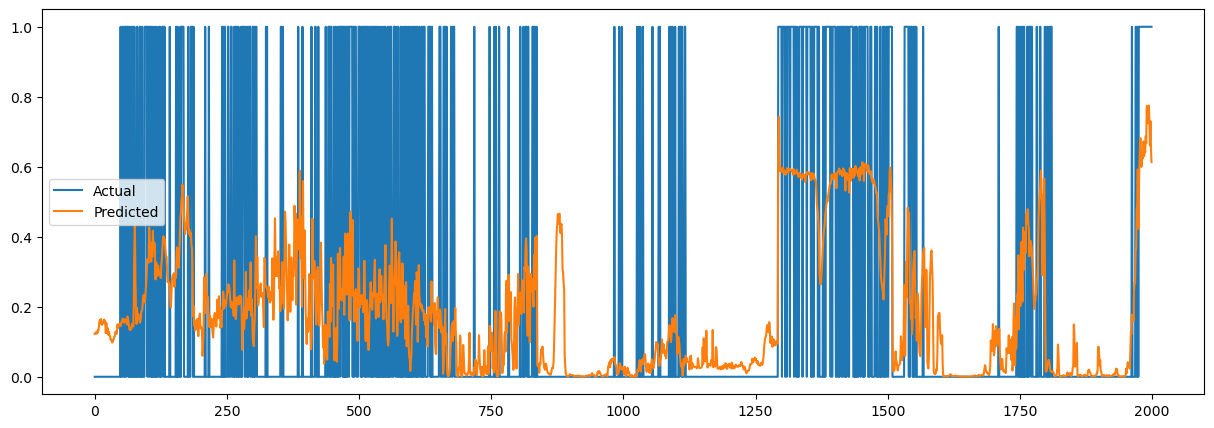

In [38]:
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [39]:
print(sum(tes)/len(tes))

[0.25793917]


In [40]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.62514243]
[0.81426442]
total acc [0.78318779]


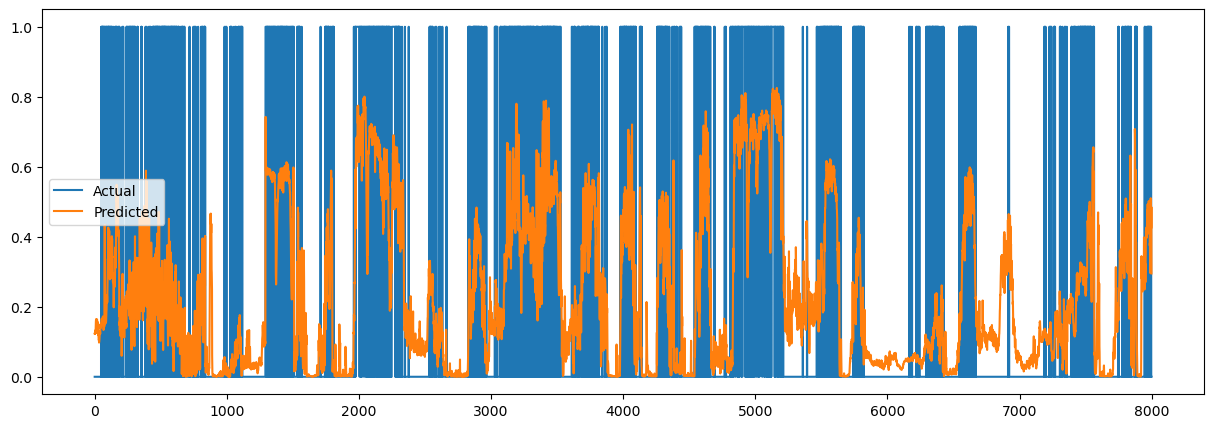

In [41]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

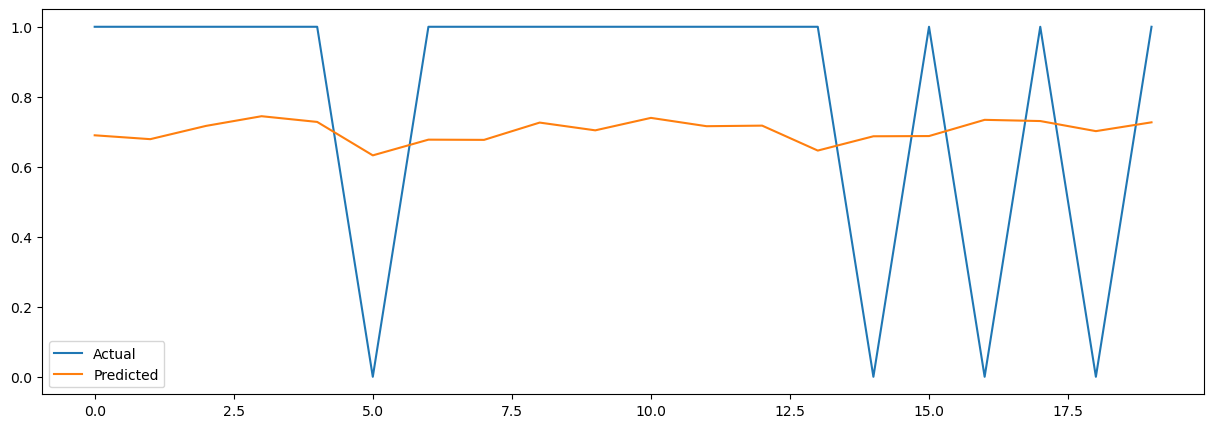

In [42]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

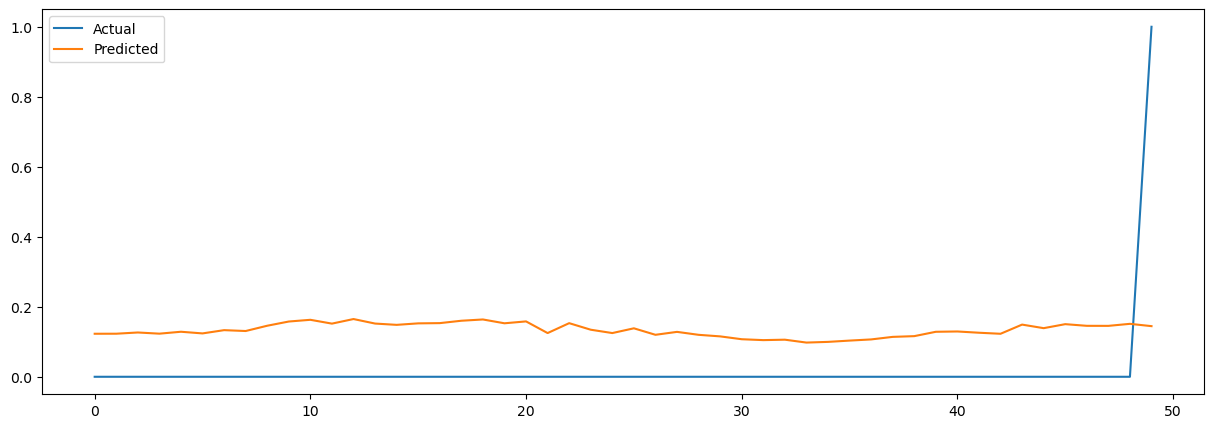

In [43]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

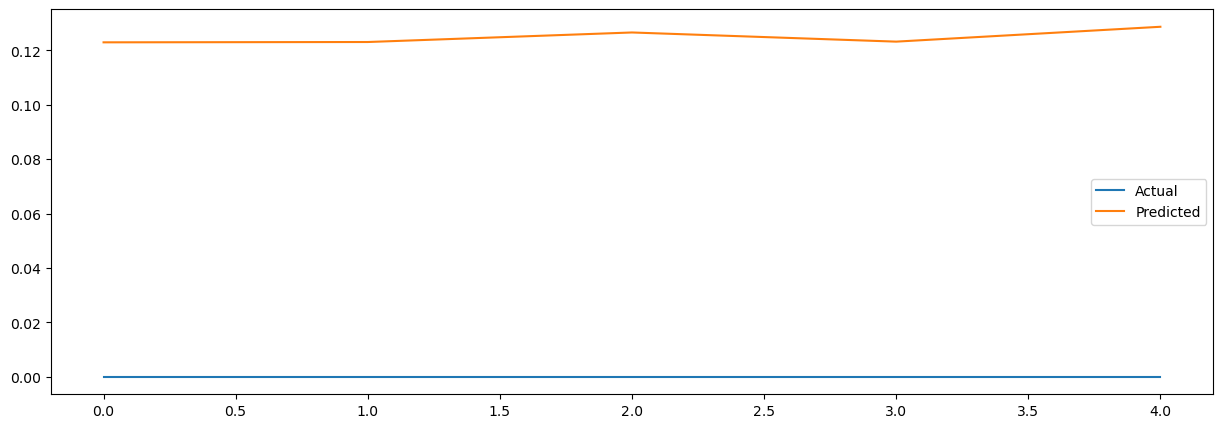

In [44]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()

In [45]:
tf.config.experimental.get_memory_info('GPU:0')

{'current': 139228672, 'peak': 279230976}